# Fourier Transform Image Processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Load the image and apply 2D Fast Fourier Transform

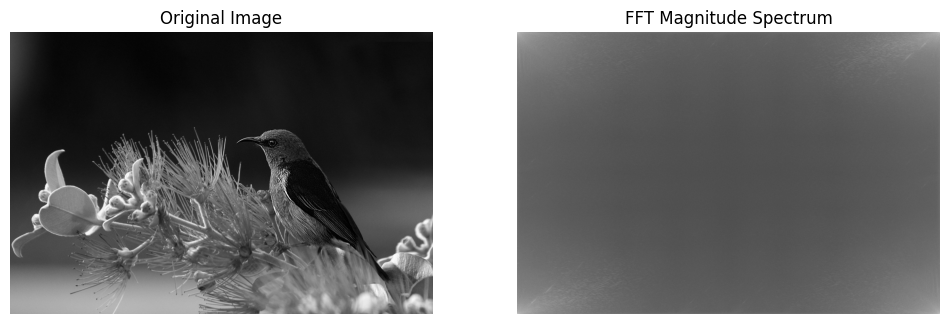

In [2]:
img = cv2.imread('bird.jpg', 0)
fft = np.fft.fft2(img)
magnitude_spectrum = np.log(np.abs(fft) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.axis('off')
plt.show()

**Interpretation:** The FFT decomposes the spatial image into frequency components. The magnitude spectrum shows frequency distribution, with corners containing low frequencies and center areas containing high frequencies in this non-shifted representation.

## 2. Shift low frequency components to center and display Fourier spectrum

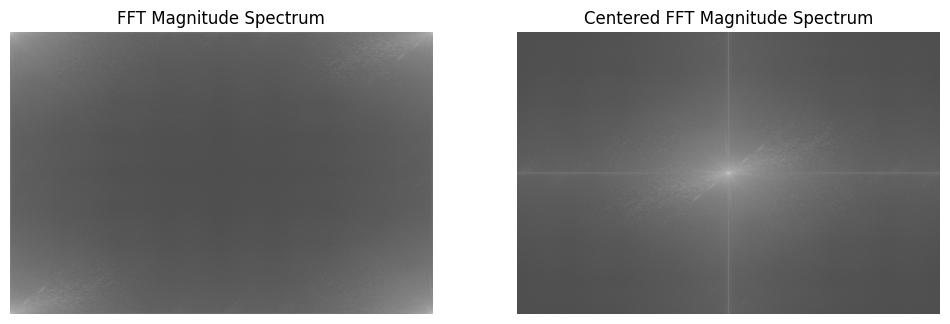

In [3]:
fft_shift = np.fft.fftshift(fft)
magnitude_spectrum_shifted = np.log(np.abs(fft_shift) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.axis('off')
plt.subplot(122)
plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.title('Centered FFT Magnitude Spectrum')
plt.axis('off')
plt.show()

**Interpretation:** After shifting, low frequencies move to the center and high frequencies to the edges. The bright center represents the DC component and low frequencies (overall intensity and smooth variations), while the outer regions represent high frequencies (edges and details).

## 3. Create Ideal Low Pass Filter

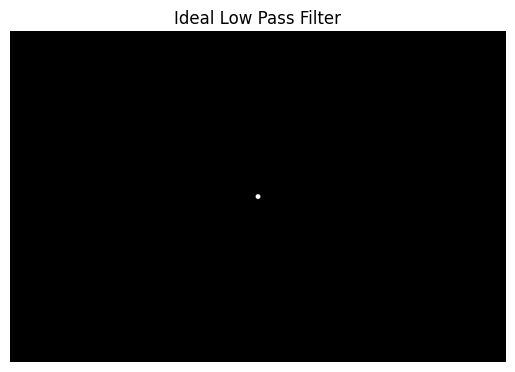

In [4]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
cutoff_frequency = 30

lpf = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        if distance <= cutoff_frequency:
            lpf[i, j] = 1

plt.imshow(lpf, cmap='gray')
plt.title('Ideal Low Pass Filter')
plt.axis('off')
plt.show()

**Interpretation:** The ideal low pass filter is a circular mask centered in the frequency domain. It passes frequencies within the cutoff radius (30 pixels) and blocks all frequencies beyond it. This will allow smooth variations to pass while removing sharp details.

## 4. Apply Low Pass Filter and detect edges

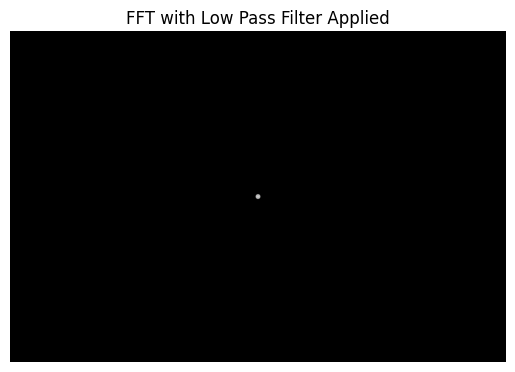

In [5]:
fft_lpf = fft_shift * lpf

plt.imshow(np.log(np.abs(fft_lpf) + 1), cmap='gray')
plt.title('FFT with Low Pass Filter Applied')
plt.axis('off')
plt.show()

**Interpretation:** Multiplying the FFT with the low pass filter removes high frequency components. The resulting spectrum shows only the central low frequencies, which correspond to smooth variations and overall structure of the image.

## 5. Decentralize frequency components (Low Pass)

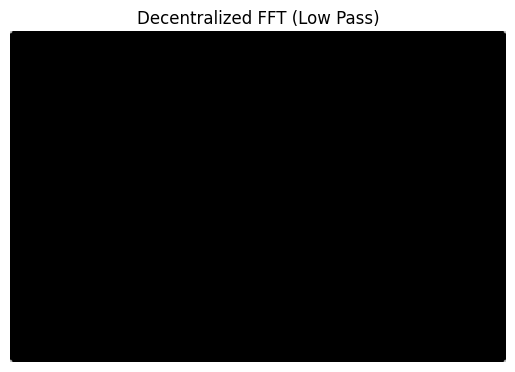

In [6]:
fft_lpf_ishift = np.fft.ifftshift(fft_lpf)

plt.imshow(np.log(np.abs(fft_lpf_ishift) + 1), cmap='gray')
plt.title('Decentralized FFT (Low Pass)')
plt.axis('off')
plt.show()

**Interpretation:** The inverse shift moves low frequencies back to the corners, preparing the spectrum for inverse FFT transformation back to the spatial domain.

## 6. Apply Inverse FFT to restore image (Low Pass)

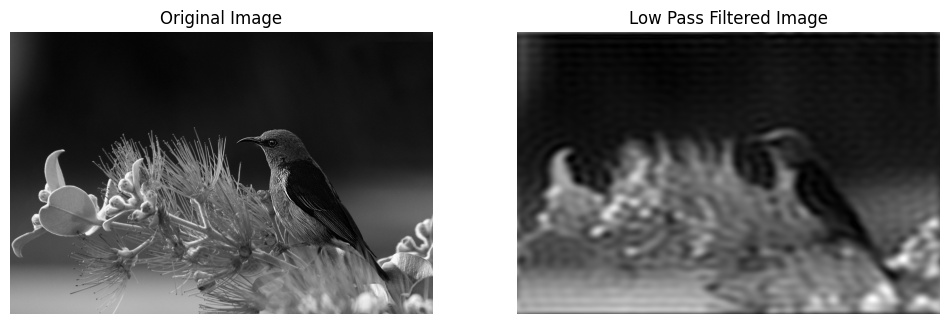

In [7]:
img_lpf = np.fft.ifft2(fft_lpf_ishift)
img_lpf = np.abs(img_lpf)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_lpf, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.axis('off')
plt.show()

**Interpretation:** The inverse FFT converts the filtered frequency domain back to spatial domain. The resulting image is smoothed/blurred because high frequency components (edges and fine details) were removed by the low pass filter.

## 7. Create Ideal High Pass Filter

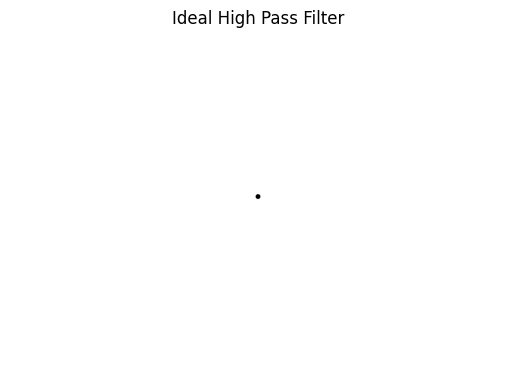

In [8]:
hpf = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        if distance > cutoff_frequency:
            hpf[i, j] = 1

plt.imshow(hpf, cmap='gray')
plt.title('Ideal High Pass Filter')
plt.axis('off')
plt.show()

**Interpretation:** The ideal high pass filter is the inverse of the low pass filter. It blocks frequencies within the cutoff radius and passes all frequencies beyond it. This will preserve edges and fine details while removing smooth variations.

## 8. Apply High Pass Filter to detect edges

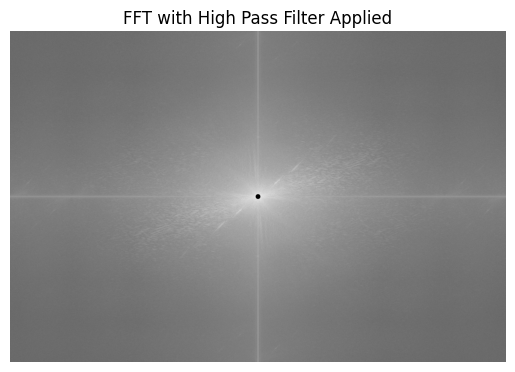

In [9]:
fft_hpf = fft_shift * hpf

plt.imshow(np.log(np.abs(fft_hpf) + 1), cmap='gray')
plt.title('FFT with High Pass Filter Applied')
plt.axis('off')
plt.show()

**Interpretation:** Multiplying the FFT with the high pass filter removes low frequency components. The resulting spectrum shows only the outer high frequencies, which correspond to edges, boundaries, and fine details in the image.

## 9. Decentralize frequency components (High Pass)

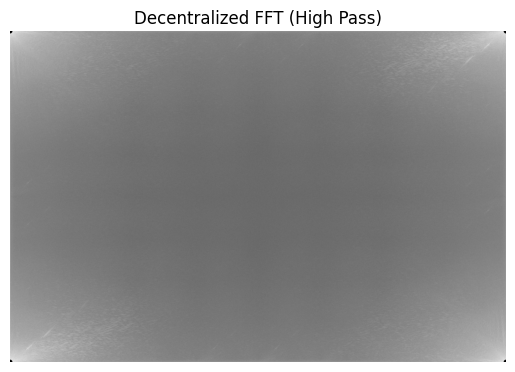

In [10]:
fft_hpf_ishift = np.fft.ifftshift(fft_hpf)

plt.imshow(np.log(np.abs(fft_hpf_ishift) + 1), cmap='gray')
plt.title('Decentralized FFT (High Pass)')
plt.axis('off')
plt.show()

**Interpretation:** The inverse shift prepares the high-pass filtered spectrum for transformation back to the spatial domain by moving frequencies back to their original positions.

## 10. Apply Inverse FFT to restore image and detect edges (High Pass)

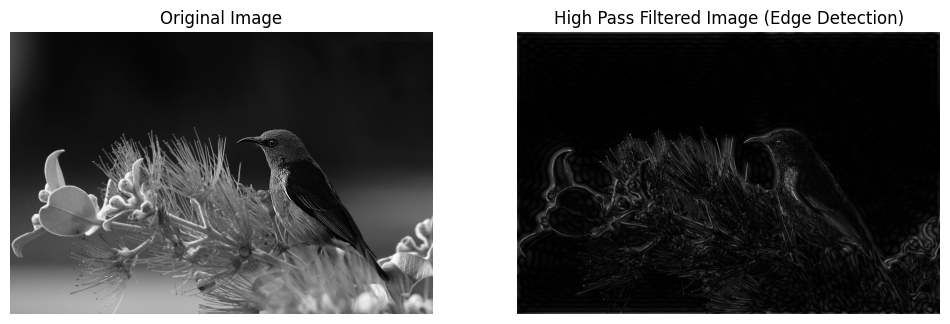

In [11]:
img_hpf = np.fft.ifft2(fft_hpf_ishift)
img_hpf = np.abs(img_hpf)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_hpf, cmap='gray')
plt.title('High Pass Filtered Image (Edge Detection)')
plt.axis('off')
plt.show()

**Interpretation:** The inverse FFT produces an edge-detected image. Since only high frequencies were retained, the result highlights edges, boundaries, and sharp transitions while suppressing uniform regions. This is an effective frequency-domain edge detection technique.